## Exercise 9.1

In [407]:
library(MASS)
library(ggplot2)
library(scales)

In [2]:
vaccine = data.frame(trt = c(rep("Placebo", 38), rep("Vaccine", 35)),
                     response = c(rep("Small", 25), rep("Moderate", 8), rep("Large", 5),
                                  rep("Small", 6), rep("Moderate", 18), rep("Large", 11)))

In [28]:
vacTab = table(vaccine)
addmargins(table(vaccine))

,Large,Moderate,Small,Sum
Placebo,5,8,25,38
Vaccine,11,18,6,35
Sum,16,26,31,73


### A: H0: Response is independent of Placebo and Vaccine, i.e. Rows and colums are independent
#### 1. Using Contigency Table approach

In [29]:
con_test = chisq.test(vacTab)

In [193]:
cat("            Expected               Observed")
cbind(con_test$expected, con_test$observed)

            Expected               Observed

,Large,Moderate,Small,Large,Moderate,Small
Placebo,8.328767,13.53425,16.13699,5,8,25
Vaccine,7.671233,12.46575,14.86301,11,18,6


In [536]:
con_test
data.frame(residuals(con_test, "deviance"))


	Pearson's Chi-squared test

data:  vacTab
X-squared = 17.648, df = 2, p-value = 0.0001472


trt,response,Freq
Placebo,Large,-1.153435
Vaccine,Large,1.201852
Placebo,Moderate,-1.504324
Vaccine,Moderate,1.567470
Placebo,Small,2.206329
Vaccine,Small,-2.298942


## Conclusion using the contigency table test:
### Treatments and response are not independent. i.e Response is dependent on treatment
### Standarized Residuals show high departure from observed frequencies.

#### 2. Using log-linear model

In [184]:
log_lin = loglin(vacTab, margin=c(c(1,2)), print=T, param=T, fit=T)

2 iterations: deviation 0 


In [185]:
cat("Log-Likelihood Ratio Statistic: D = ",log_lin$lrt)
cat("\nChi-Squared Statistic: X^2 = ", log_lin$pearson)
cat("\nBoth the above Statistics with degrees of freedom = ",log_lin$df)

Log-Likelihood Ratio Statistic: D =  18.64253
Chi-Squared Statistic: X^2 =  17.64783
Both the above Statistics with degrees of freedom =  2

In [186]:
cat("           Expected                 Observed")
cbind(log_lin$fit, table(vaccine))

           Expected                 Observed

,Large,Moderate,Small,Large,Moderate,Small
Placebo,8.328767,13.53425,16.13699,5,8,25
Vaccine,7.671233,12.46575,14.86301,11,18,6


In [539]:
cat( "         ____|Standarized Residuals|____")
ftable(vacTab - log_lin$fit)/sqrt(log_lin$fit)

         ____|Standarized Residuals|____

        response     Large  Moderate     Small
trt                                           
Placebo          -1.153435 -1.504324  2.206329
Vaccine           1.201852  1.567470 -2.298942

##### Residuals show that the model is overestimating Placebo responses for Large and Moderate effect, underestimating Vaccine responses for Large and Moderate responses, and the exact opposite for Placebo and Vaccine for small response.

In [188]:
log_lin$param

$`(Intercept)`
[1] 2.460898

$trt
    Placebo     Vaccine 
 0.04111905 -0.04111905 

$response
     Large   Moderate      Small 
-0.3823021  0.1032057  0.2790964

### Model: ada (j,k) = mu + alpha (i) + beta (j)
#### In the fitted Model:
#### mu = Intercept = 2.461
#### alpha1 = Placebo = 0.041 | alpha2 = Vaccine = -0.041
#### beta1 = Large = -0.382 | beta2 = Moderate = 0.103 | beta3 = Small = 0.279
#### To get the expected count for Placebo with Large response, use: exp(2.461+0.041-0.382) = 8.33
#### Likelihood Ratio Statistic: D = 18.64 and Chi-Squared statistic: X^2 = 17.64 | d.f = 2
## Conclusion:
### The chi-squared statistic is significant thus, the interaction effect cannot be ignored, and responses differ for the placebo and vaccine groups

# Exercise 9.2

In [350]:
ContactOtherResidents = c(rep("Low",65+54+100+130+76+111+67+48+62),rep("High",34+47+100+141+116+191+130+105+104))

Satisfaction=c(rep("Low",65+130+67),rep("Meduim",54+76+48),rep("High",100+111+62),
                                  rep("Low",34+141+130),rep("Meduim",47+116+105),rep("High",100+191+104))

HousingType = c(rep("Tower_Block",65),rep("Apartments",130),rep("Houses",67),
               rep("Tower_Block",54),rep("Apartments",76),rep("Houses",48),
               rep("Tower_Block",100),rep("Apartments",111),rep("Houses",62),
               rep("Tower_Block",34),rep("Apartments",141),rep("Houses",130),
               rep("Tower_Block",47),rep("Apartments",116),rep("Houses",105),
               rep("Tower_Block",100),rep("Apartments",191),rep("Houses",104))

housing = data.frame(HousingType, Satisfaction, ContactOtherResidents)
dim(housing)

[1] 1681    3

In [351]:
table(housing$HousingType)


 Apartments      Houses Tower_Block 
        765         516         400 

In [352]:
cat("Percentage of places where people lived and their contact with other residents")
round(prop.table(table(housing$ContactOtherResidents, housing$HousingType), 2) * 100, 2)

Percentage of places where people lived and their contact with other residents

      
       Apartments Houses Tower_Block
  High      58.56  65.70       45.25
  Low       41.44  34.30       54.75

### Of all the people living in Tower Blocks 50% had High satisfaction, of all the people living in Houses 38.18 % op people had High satisfaction and of all the people living in Apartments 39.48 % of people had High satisfaction.

Rows = Satisfaction Level
Columns = Housing Type

        Column Totals                       Row Totals

,Apartments,Houses,Tower_Block,Sum,Apartments,Houses,Tower_Block,Sum
High,39.48,32.17,50.00,121.65,45.21,24.85,29.94,100
Low,35.42,38.18,24.75,98.35,47.80,34.74,17.46,100
Meduim,25.10,29.65,25.25,80.00,43.05,34.30,22.65,100
Sum,100.00,100.00,100.00,300.00,136.05,93.90,70.05,300


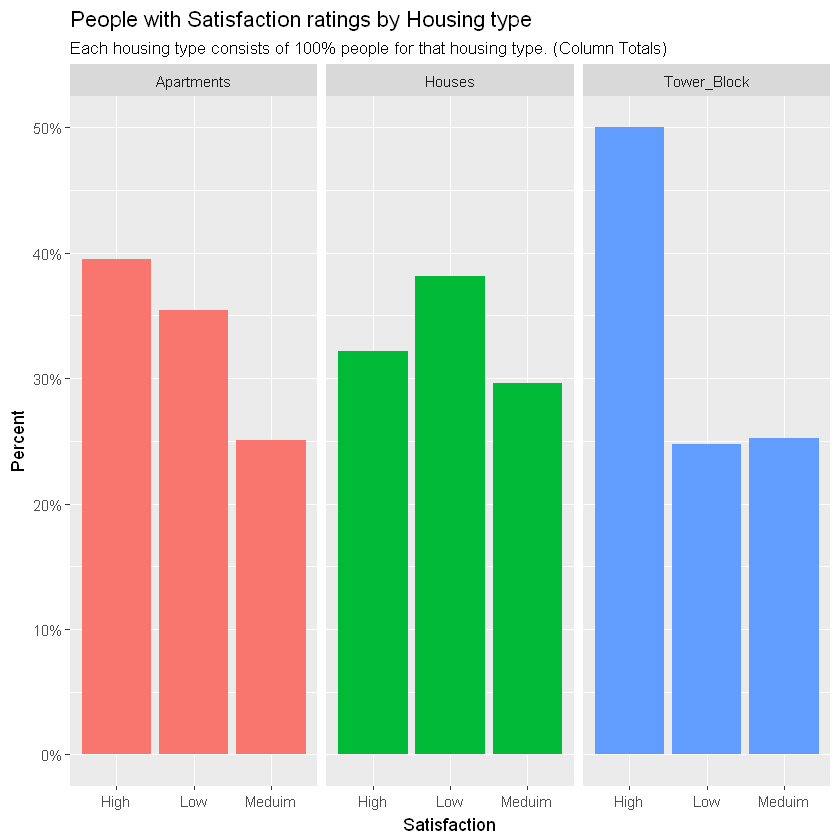

In [405]:
a = round(addmargins(prop.table(table(housing$Satisfaction, housing$HousingType),2)) * 100, 2)
b = round(addmargins(prop.table(table(housing$Satisfaction, housing$HousingType),1)) * 100, 2)
cat("Rows = Satisfaction Level\nColumns = Housing Type\n\n        Column Totals                       Row Totals")
cbind(a,b)
ggplot(housing, aes(Satisfaction)) +
    geom_bar(aes(y = (..count..)/tapply(..count..,..PANEL..,sum)[..PANEL..], fill=HousingType)) +
    labs(y="Percent", title="People with Satisfaction ratings by Housing type",
        subtitle = "Each housing type consists of 100% people for that housing type. (Column Totals)") +
    scale_y_continuous(labels=percent) +    
    facet_wrap(~HousingType) +
    theme(legend.position = "none")

### Of all the people making within their own housing type, people living in Tower Blocks were significantly more Satisfied than people living in Houses or Apartments. 

Rows = Contact with Other Residents
Columns = Housing Types

        Column Totals                    Row Totals

,Apartments,Houses,Tower_Block,Sum,Apartments,Houses,Tower_Block,Sum
High,58.56,65.7,45.25,169.51,46.28,35.02,18.70,100
Low,41.44,34.3,54.75,130.49,44.46,24.82,30.72,100
Sum,100.00,100.0,100.00,300.00,90.74,59.85,49.41,200


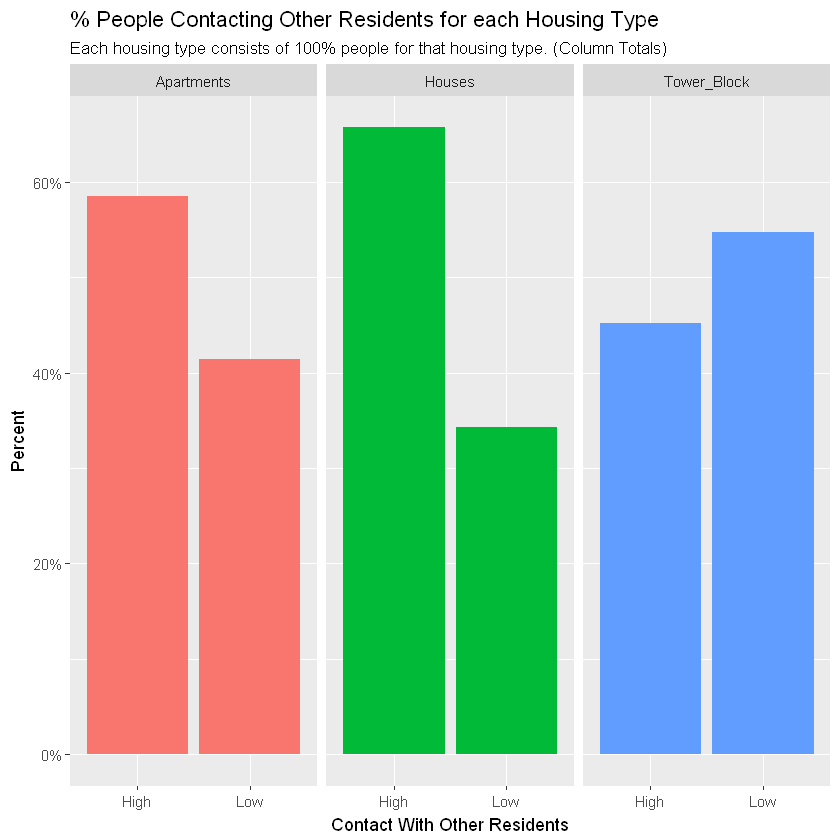

In [541]:
a = round(addmargins(prop.table(table(housing$ContactOtherResidents, housing$HousingType), 2)) * 100, 2)
b = round(addmargins(prop.table(table(housing$ContactOtherResidents, housing$HousingType), 1)) * 100, 2)
cat("Rows = Contact with Other Residents\nColumns = Housing Types\n\n        Column Totals                    Row Totals")
cbind(a,b)
ggplot(housing, aes(ContactOtherResidents)) +
    geom_bar(aes(y = (..count..)/tapply(..count..,..PANEL..,sum)[..PANEL..], fill=HousingType)) +
    labs(y="Percent", x="Contact With Other Residents", title="% People Contacting Other Residents for each Housing Type",
        subtitle = "Each housing type consists of 100% people for that housing type. (Column Totals)") +
    scale_y_continuous(labels = percent) +
    facet_wrap(~HousingType) +
    theme(legend.position ="none")

### Maybe a humorous point. People living in Houses and with LOW Satisfaction had surprisingly increased level of contact with fellow residents. I suppose they Argued with fellow residents a lot!

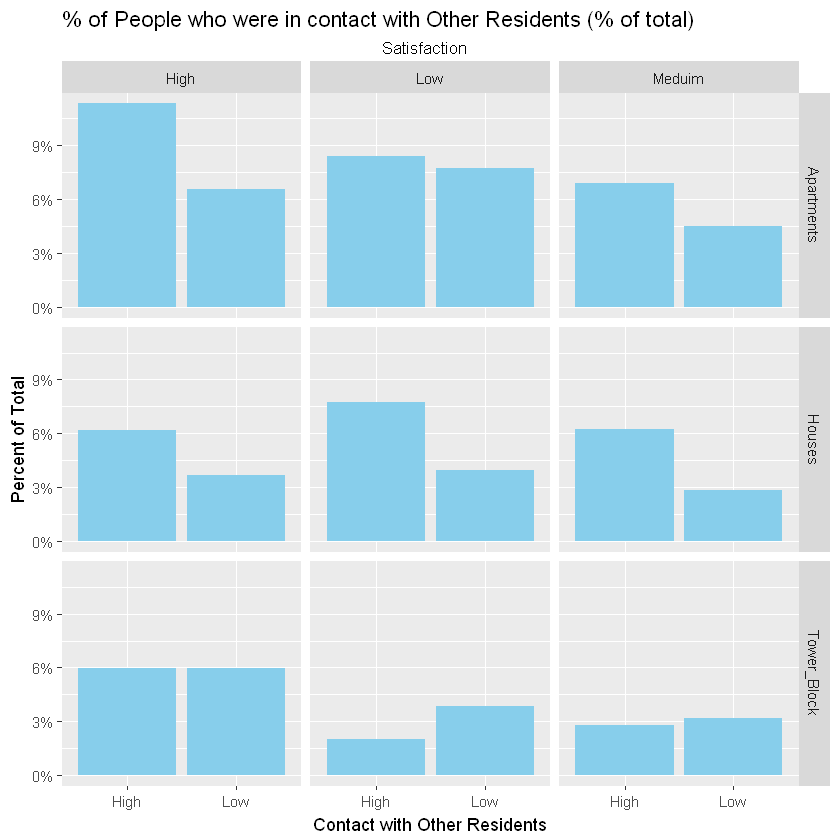

In [532]:
ggplot(housing, aes(ContactOtherResidents)) +
    geom_bar(aes(y=..count../sum(..count..)),fill="skyblue") +
    scale_y_continuous(label=percent) +
    labs(x = "Contact with Other Residents", y = "Percent of Total", 
         title="% of People who were in contact with Other Residents (% of total)",
         subtitle="                                                                Satisfaction") +
    facet_grid(HousingType~Satisfaction)

### Fitting models

In [411]:
tabData = table(housing)
# 1 = Housing
# 2 = Satisfaction
# 3 = Contact

In [422]:
fullModel = loglm(~ 1 + 2 + 3 + 1:2 + 1:3 + 2:3, data=tabData)
Hinteraction = loglm(~ 1 + 2 + 3 + 1:2 + 1:3, data=tabData)
HSInteraction = loglm(~ 1 + 2 + 3 + 1:2, data=tabData)
simpleModel = loglm(~ 1 + 2 + 3, data=tabData)

In [526]:
res = data.frame(d.f = c(fullModel$df, Hinteraction$df, HSInteraction$df, simpleModel$df),
          Pearson_Statistic = c(fullModel$pearson, Hinteraction$pearson, HSInteraction$pearson, simpleModel$pearson),
          Likelihood_Ratio_Statistic = c(fullModel$lrt, Hinteraction$lrt, HSInteraction$lrt, simpleModel$lrt))
rownames(res) = c("2_Interactions", "Housing_Interaction", "Housing_*_Satisfaction", "Simple_Model")
res

,d.f,Pearson_Statistic,Likelihood_Ratio_Statistic
2_Interactions,4,6.932313,6.893028
Housing_Interaction,6,15.683252,15.760770
Housing_*_Satisfaction,8,54.750671,54.818556
Simple_Model,12,85.347438,89.348114


In [462]:
anova(fullModel, Hinteraction, HSInteraction, simpleModel)

LR tests for hierarchical log-linear models

Model 1:
 ~1 + 2 + 3 
Model 2:
 ~1 + 2 + 3 + 1:2 
Model 3:
 ~1 + 2 + 3 + 1:2 + 1:3 
Model 4:
 ~1 + 2 + 3 + 1:2 + 1:3 + 2:3 

           Deviance df Delta(Dev) Delta(df) P(> Delta(Dev)
Model 1   89.348114 12                                    
Model 2   54.818556  8  34.529558         4        0.00000
Model 3   15.760770  6  39.057787         2        0.00000
Model 4    6.893028  4   8.867742         2        0.01187
Saturated  0.000000  0   6.893028         4        0.14165

### Anova on the fitted models suggests that all 2 way interactions are significant. Thus, full model is the best fit. The saturated model will be the contigency table with (3-1) x (3-1) x (2-1) = 4 d.f. or the one with three way interactions as well.
### ada(i,j,k)  = mu + alpha(i) + beta(j) + gamma(k) + (alpha x beta)(i,j) + (alpha x gamma)(i,k) + (beta x gamma)(j,k)
#### Parameter Estimates are:
#### mu = Intercept = 4.45
#### alpha1 = Apartments = 0.37 | alpha2 = Houses = -0.05 | alpha3 = Tower Block = -0.31
#### beta1 = Satisfaction(High) = 0.20 | beta2 = Satisfaction(Low) = 0.004 | beta3 = Satisfaction(Medium) = -0.20
#### gamma1 = ContactOtherResidents(High) = 0.13 | gamma2 = ContactOtherResidents(Low) = -0.13

In [484]:
fullModel$param[c(1,2,3,4)]

$`(Intercept)`
[1] 4.445933

$HousingType
 Apartments      Houses Tower_Block 
 0.36620929 -0.05446115 -0.31174815 

$Satisfaction
        High          Low       Meduim 
 0.199614215  0.003801105 -0.203415319 

$ContactOtherResidents
      High        Low 
 0.1329239 -0.1329239

### Analyzing Standarized Residuals of model with all 2 way interactions

In [521]:
a = data.frame(residuals(fullModel, type="deviance"))
a = cbind(a, data.frame(residuals(fullModel, "response"))$Freq)
a = cbind(a, data.frame(tabData)$Freq)
colnames(a) = c("HousingType","Satisfaction","ContactOtherResidents", "Std.Residuals","Raw.Residuals","Observed")
a$Expected = round(a$Observed - a$Raw.Residuals,2)
a

Re-fitting to get frequencies and fitted values
Re-fitting to get frequencies and fitted values


HousingType,Satisfaction,ContactOtherResidents,Std.Residuals,Raw.Residuals,Observed,Expected
Apartments,High,High,0.36545868,5.0063179,191,185.99
Houses,High,High,-0.96176787,-10.1188717,104,114.12
Tower_Block,High,High,0.52023757,5.1125538,100,94.89
Apartments,Low,High,-0.35261548,-4.2286249,141,145.23
Houses,Low,High,0.82994617,9.2346450,130,120.77
Tower_Block,Low,High,-0.81967565,-5.0060201,34,39.01
Apartments,Meduim,High,-0.07204273,-0.7776549,116,116.78
Houses,Meduim,High,0.08658788,0.8847643,105,104.12
Tower_Block,Meduim,High,-0.01561166,-0.1071094,47,47.11
Apartments,High,Low,-0.46825156,-5.0066919,111,116.01


## Conclusion:
### Model with all three interactions seems like a good fit because the standarized residuals are well behaved and the chi-squared test of 2 interactions vs 3 interactions is significant with:
### Delta Deviance = 8.87 with d.f = 2
### P-value = 0.01 